In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option("display.max_columns",30)
import plotly.graph_objects as go

## uploading the data
## reading the data

In [ ]:
df=pd.read_csv("/content/breast_cancer.csv")

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,...,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,...,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,...,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,...,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,...,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
502,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.032790,0.1943,0.06612,0.2577,1.0950,1.566,18.49,0.009702,...,0.02575,0.011610,0.02801,0.002480,13.57,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538,1
224,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,0.1496,0.05674,0.2927,0.8907,2.044,24.68,0.006032,...,0.02259,0.009057,0.01482,0.002496,15.14,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623,1
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.026480,0.1386,0.05318,0.4057,1.1530,2.701,36.35,0.004481,...,0.01358,0.010820,0.01069,0.001435,16.36,22.35,104.50,830.6,0.10060,0.12380,0.13500,0.10010,0.2027,0.06206,1
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,...,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,1
90,14.620,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.029570,0.1685,0.05866,0.3721,1.1110,2.279,33.76,0.004868,...,0.01121,0.008606,0.02085,0.002893,16.11,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246,1
76,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,0.2403,0.06641,0.4101,1.0140,2.652,32.65,0.013400,...,0.01162,0.008239,0.02572,0.006164,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191,1
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.3630,2.054,18.24,0.007440,...,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920,1
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.057780,0.1770,0.05340,0.6362,1.3050,4.312,76.36,0.005530,...,0.06110,0.014440,0.02140,0.005036,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.25350,0.09181,0.2369,0.06558,0
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.074040,0.2015,0.05875,0.6412,2.2930,4.021,48.84,0.014180,...,0.01267,0.019100,0.02678,0.003002,12.40,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,...,0.01985,0.014210,0.02027,0.002968,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,...,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,...,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,...,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,...,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,...,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,...,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,...,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.shape

(569, 31)

## Univariate analysis

In [ ]:
df["mean radius"].value_counts()

,count
mean radius,
12.34,4
11.71,3
12.46,3
13.05,3
10.26,3
...,...
12.23,1
14.45,1
19.18,1


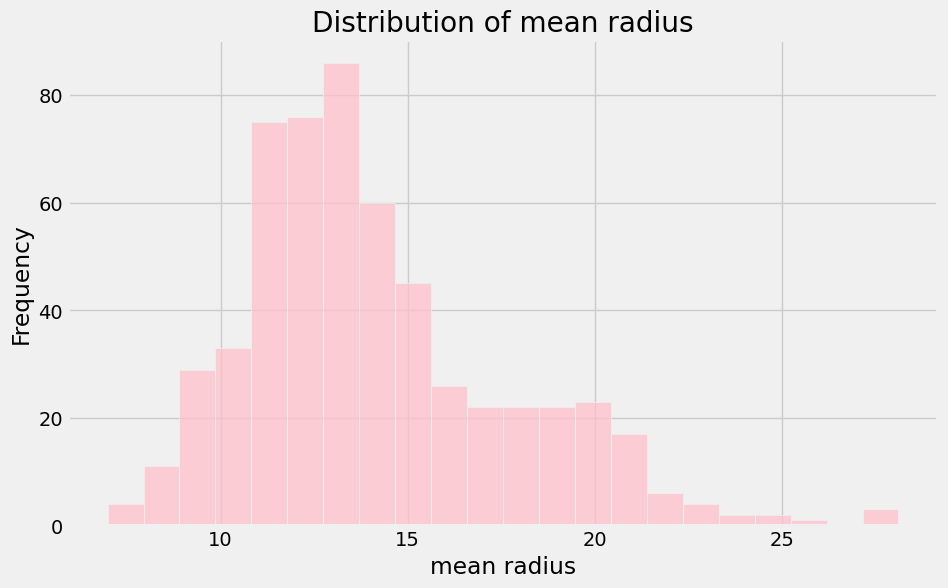

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["mean radius"], kde=False, color="pink")
plt.title("Distribution of mean radius")
plt.xlabel("mean radius")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df["mean texture"].value_counts()

,count
mean texture,
20.52,3
16.85,3
16.84,3
19.83,3
14.93,3
...,...
18.58,1
15.11,1
22.41,1


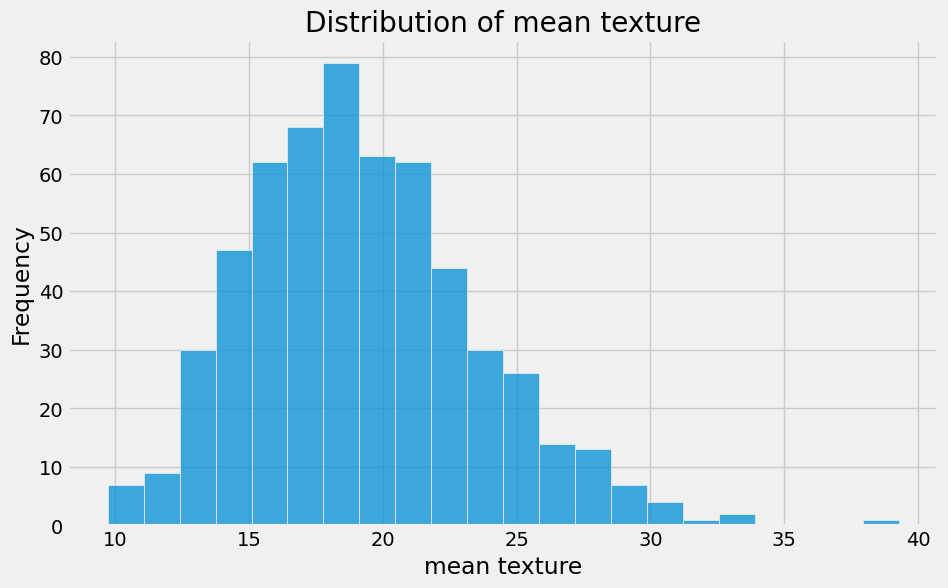

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x="mean texture",data=df,palette="viridis")
plt.title("Distribution of mean texture")
plt.xlabel("mean texture")
plt.ylabel("Frequency")
plt.show()

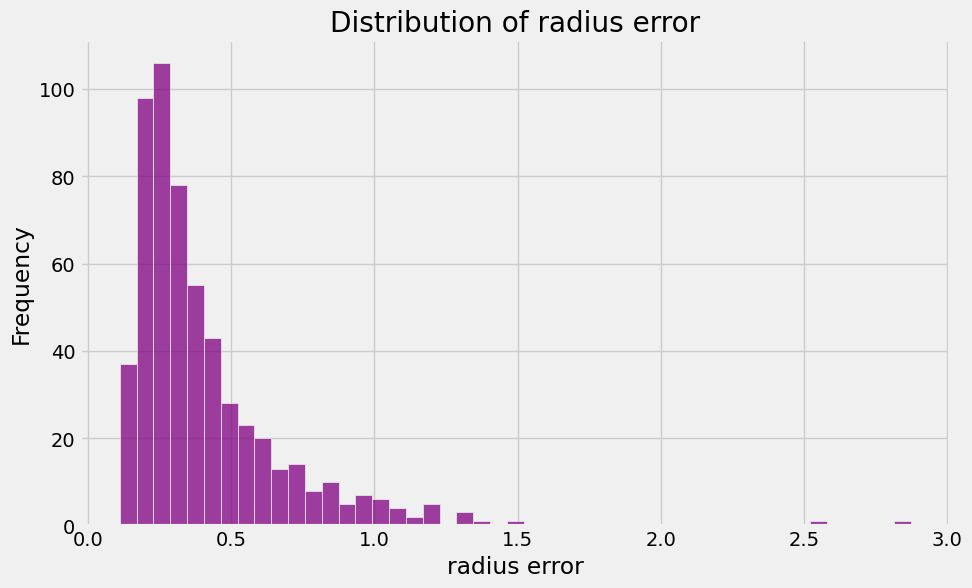

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["radius error"], color="purple")
plt.title("Distribution of radius error")
plt.xlabel("radius error")
plt.ylabel("Frequency")  # Corrected typo here
plt.show()

In [ ]:
df["radius error"].value_counts()

,count
radius error,
0.2860,3
0.2204,3
0.2684,2
0.2239,2
0.1601,2
...,...
0.6298,1
0.8361,1
0.2889,1


In [ ]:
df["radius error"]

,radius error
0,1.0950
1,0.5435
2,0.7456
3,0.4956
4,0.7572
...,...
564,1.1760
565,0.7655
566,0.4564
567,0.7260


In [ ]:
df["target"]

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


<Axes: ylabel='count'>

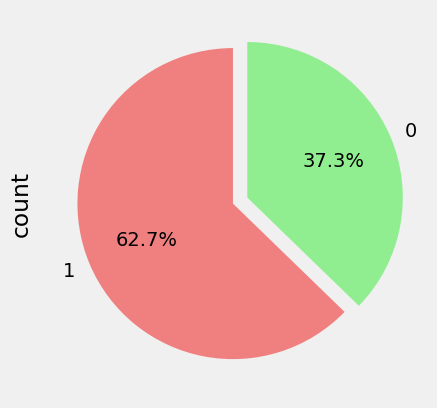

In [ ]:
df["target"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightcoral", "lightgreen"], explode=(0, 0.1), startangle=90)

In [ ]:
df["area error"].value_counts()

,count
area error,
16.97,3
17.67,3
16.64,3
18.54,3
20.98,2
...,...
26.43,1
22.77,1
40.98,1


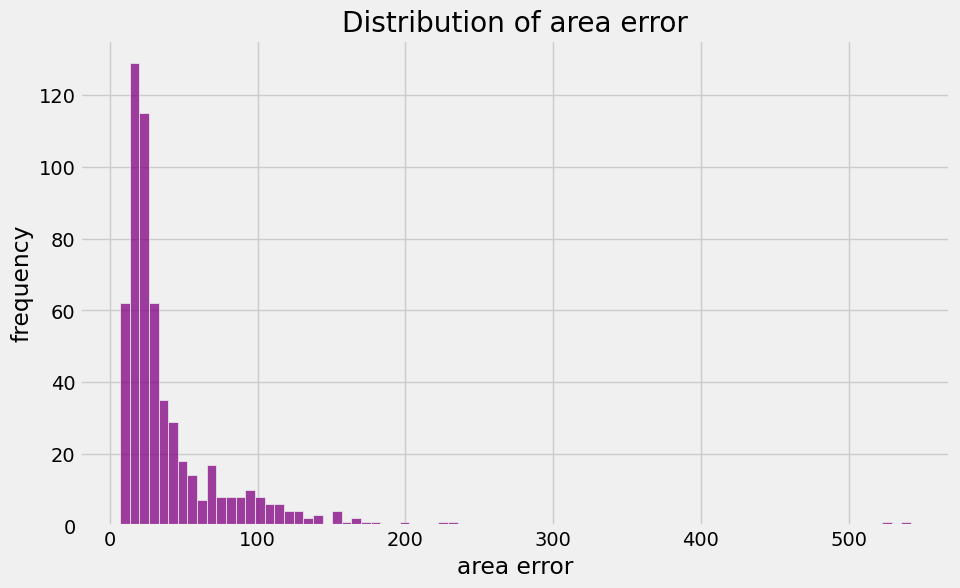

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["area error"],color="purple")
plt.title("Distribution of area error")
plt.xlabel("area error")
plt.ylabel("frequency")
plt.show()

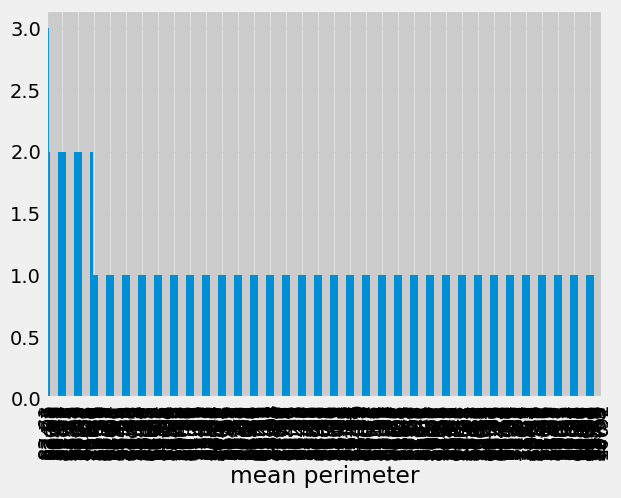

In [ ]:
df['mean perimeter'].value_counts().plot.bar()
plt.show()

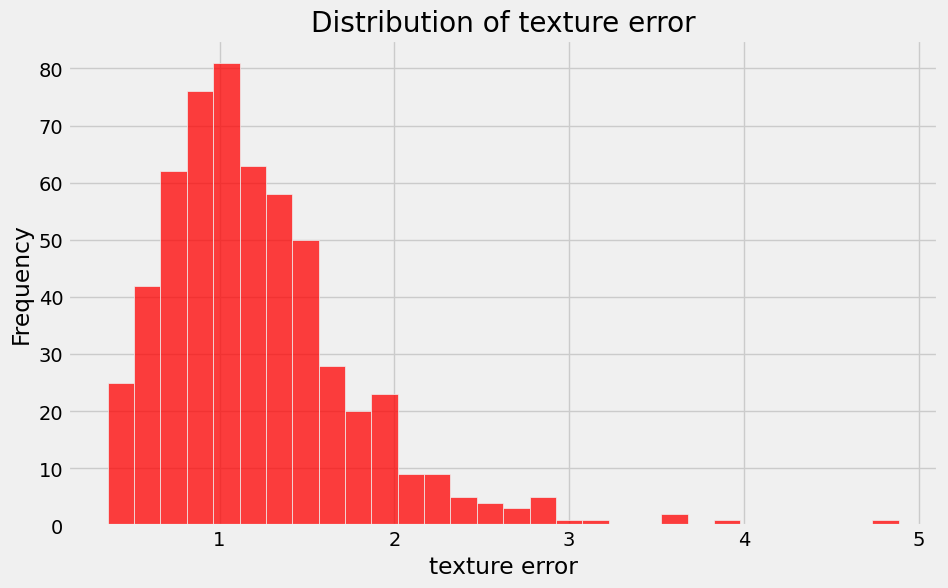

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["texture error"],color="red")
plt.title("Distribution of texture error")
plt.xlabel("texture error")
plt.ylabel("Frequency")
plt.show()

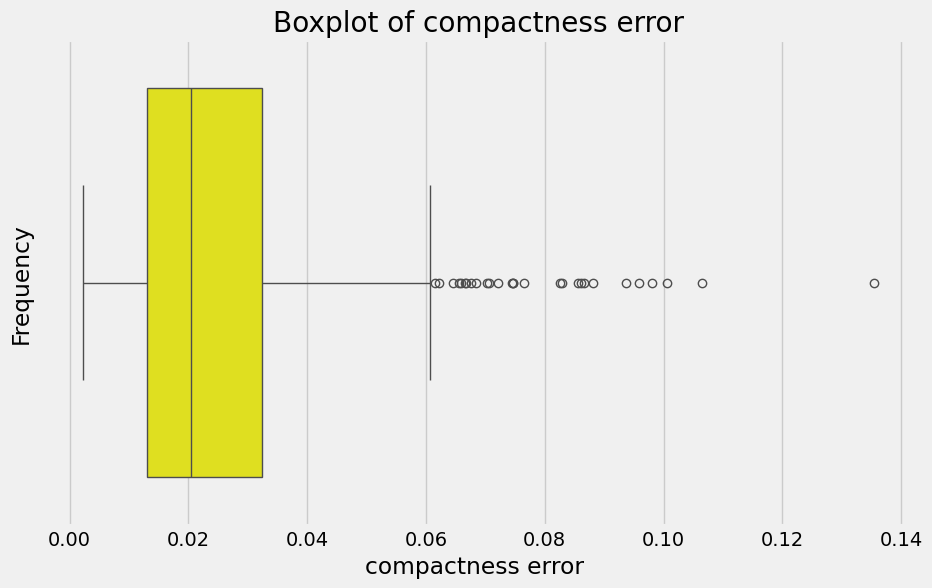

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="compactness error",data=df,color="yellow")
plt.xlabel("compactness error ")
plt.ylabel("Frequency")
plt.title("Boxplot of compactness error")
plt.show()

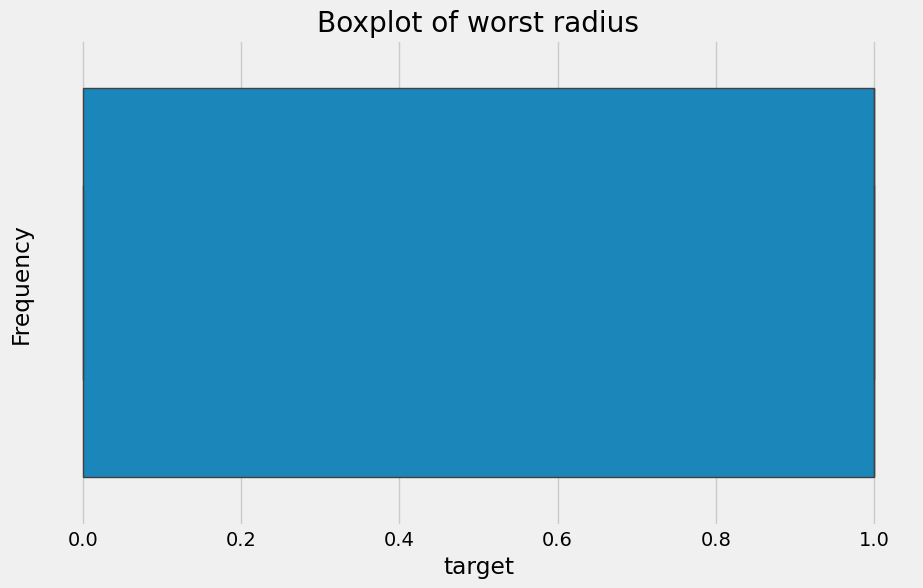

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="target", data=df)
plt.xlabel("target")
plt.ylabel("Frequency")
plt.title("Boxplot of worst radius")
plt.show()

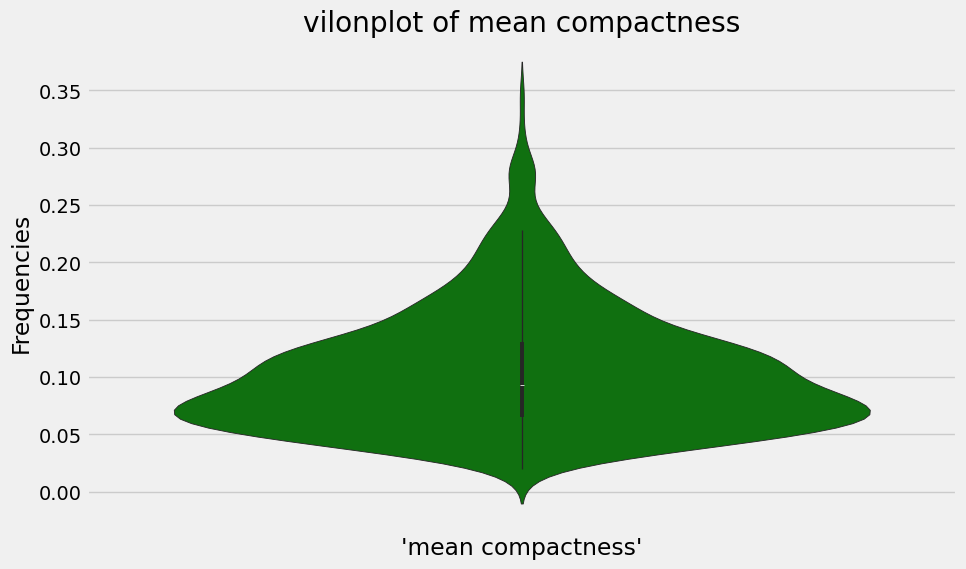

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(y="mean compactness",data=df,color="green")
plt.xlabel("'mean compactness'")
plt.ylabel("Frequencies")
plt.title("vilonplot of mean compactness")
plt.show()

viloin plot tells about the distribution of data in the above fig the top line is the range the bottom end of line is known as low proability the center of the line is high proability of distribution with median and q intervals lines around the centerthe line
 of

<Axes: xlabel='mean smoothness'>

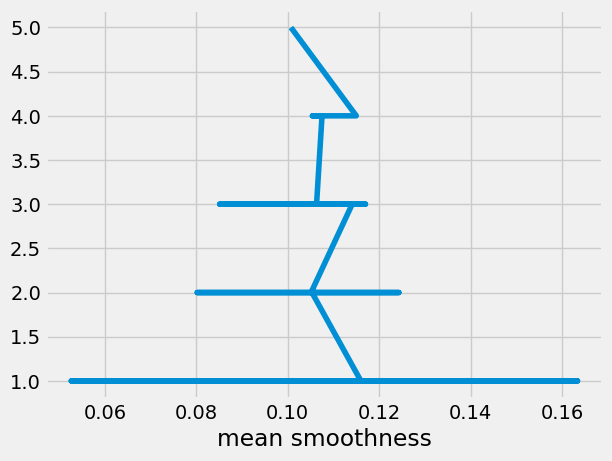

In [ ]:
df['mean smoothness'].value_counts().plot.line()

## bivariate analysis

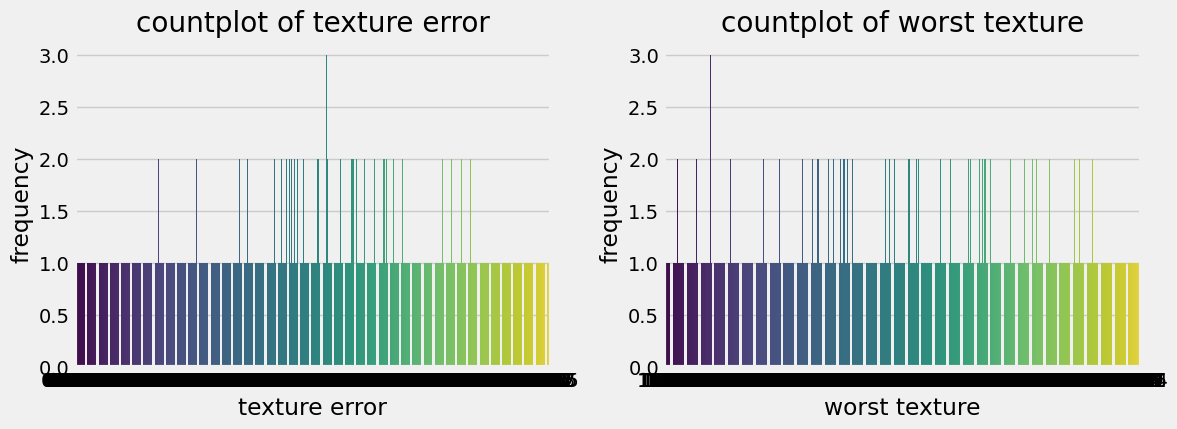

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x="texture error",data=df,palette="viridis")
plt.title("countplot of texture error")
plt.xlabel("texture error")
plt.ylabel("frequency")

plt.subplot(2,2,2)
sns.countplot(x="worst texture",data=df,palette="viridis")
plt.title("countplot of worst texture")
plt.xlabel("worst texture")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()






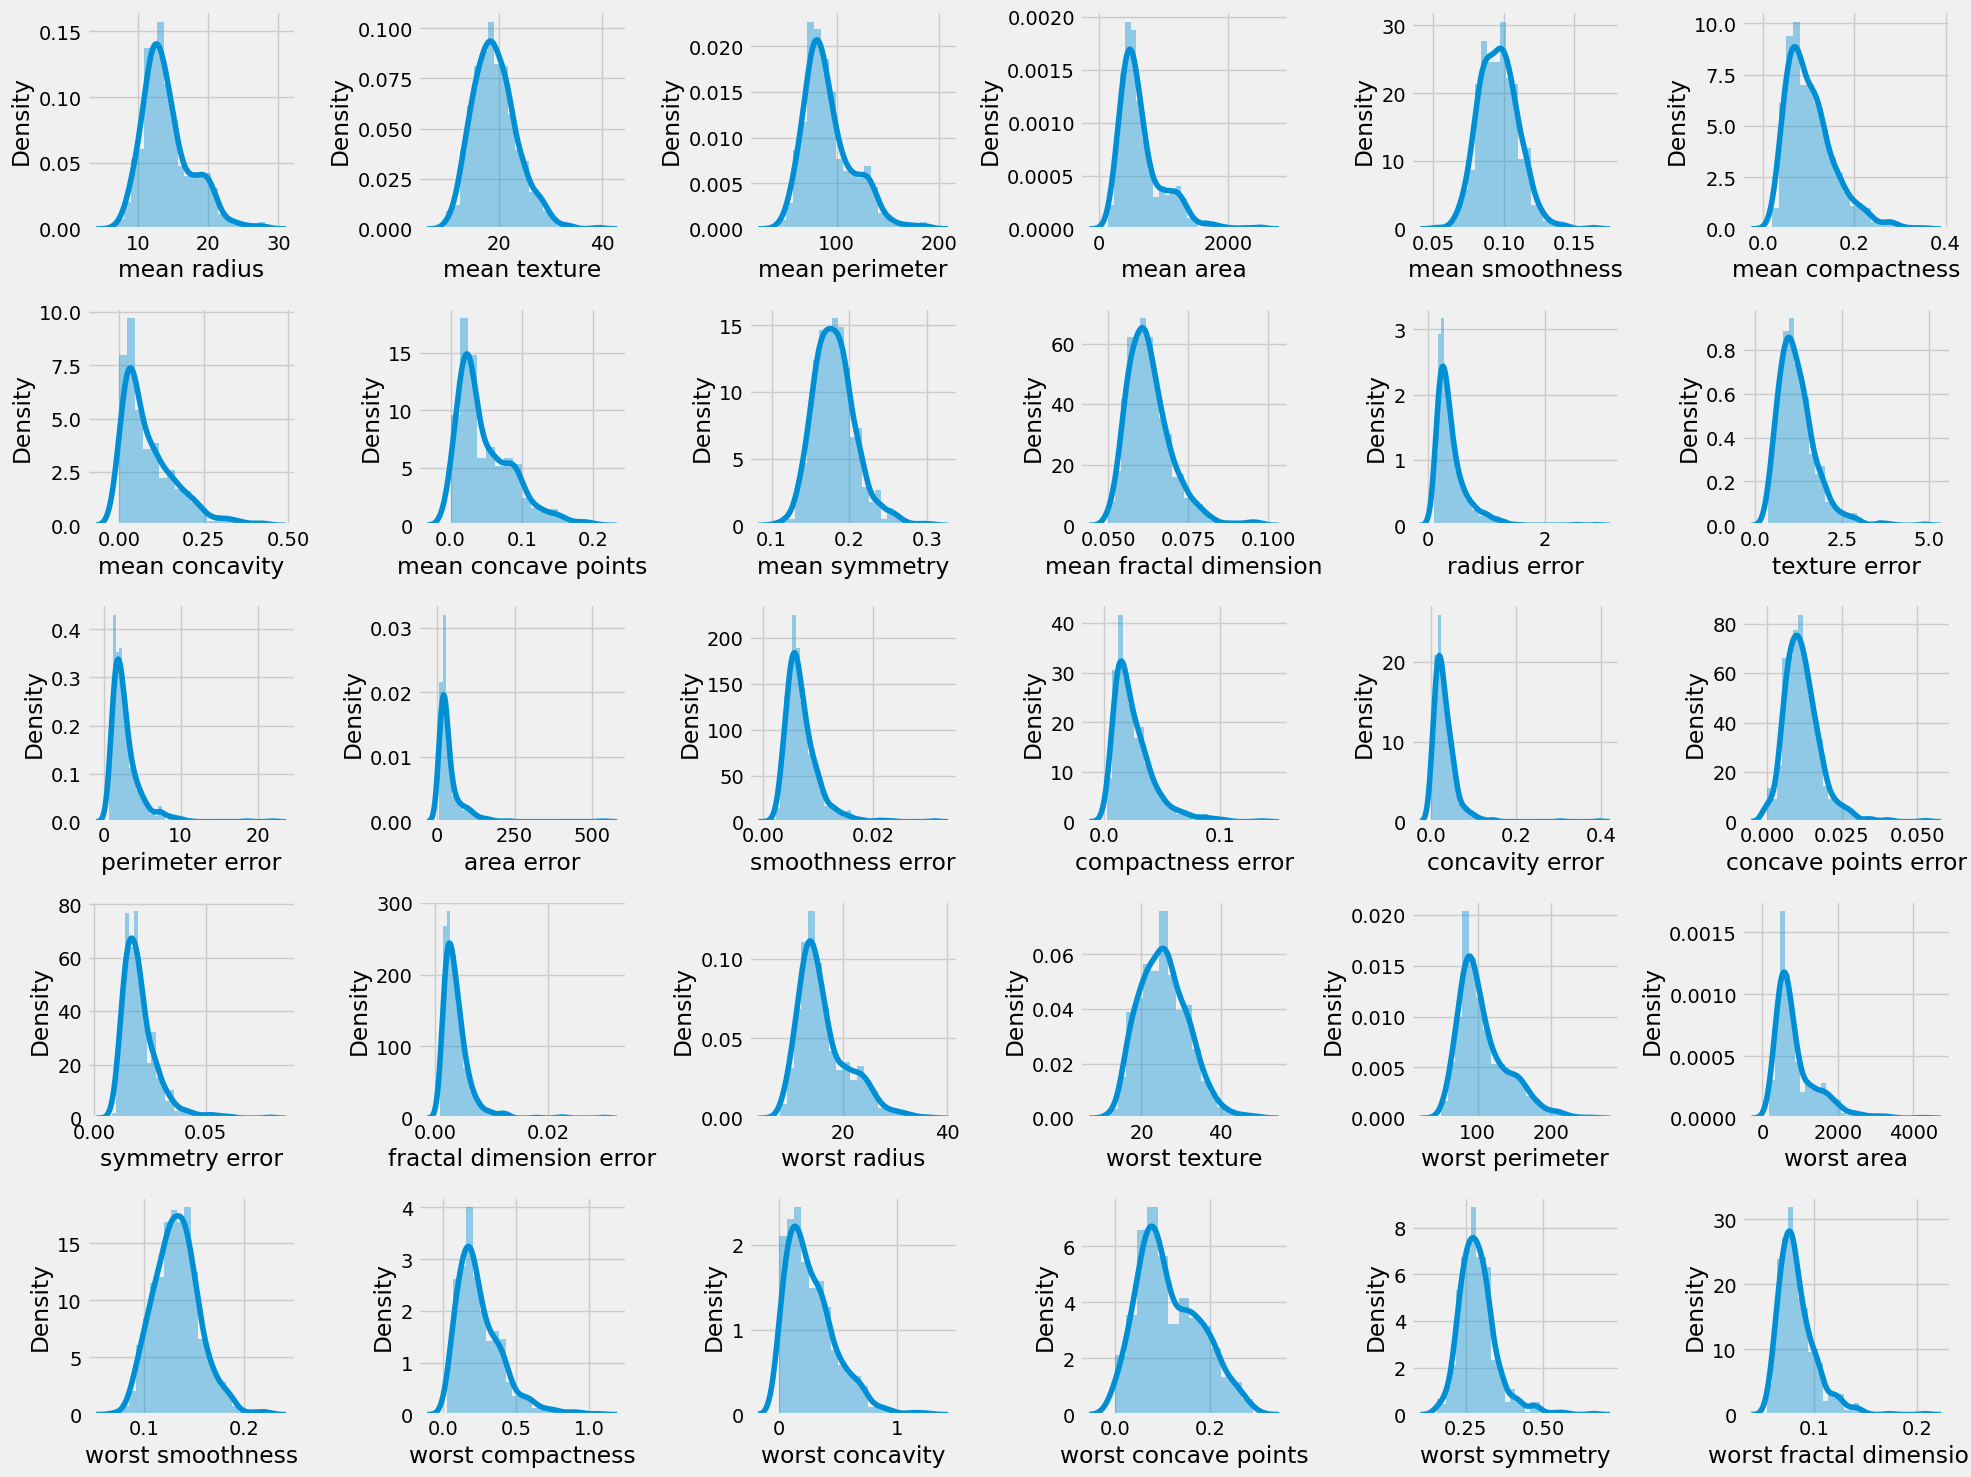

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='symmetry error', ylabel='Density'>

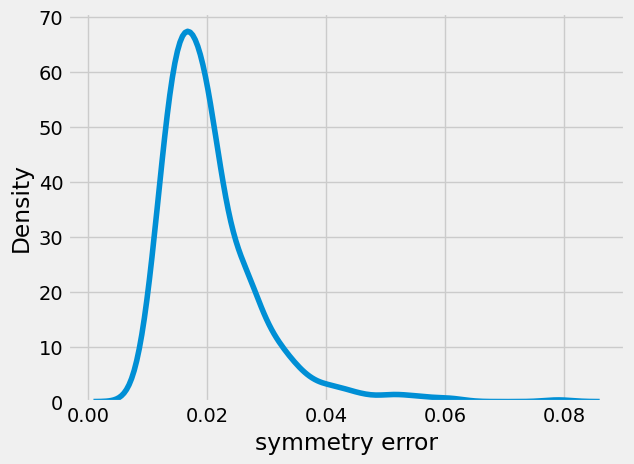

In [ ]:
sns.kdeplot(df["symmetry error"])

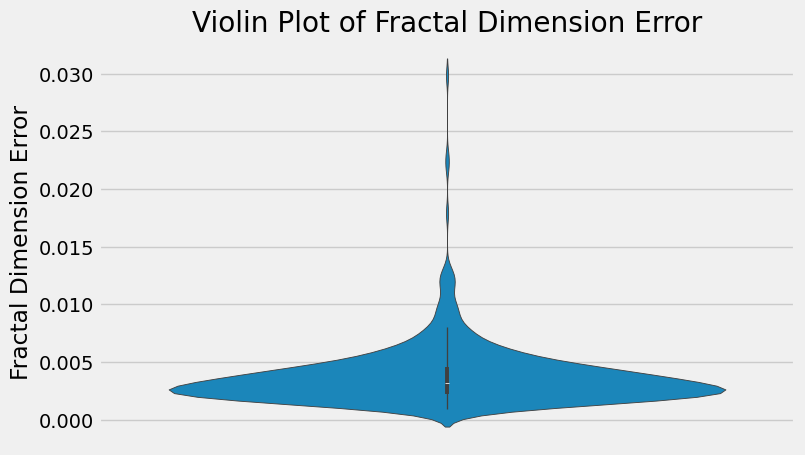

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(y='fractal dimension error', data=df)
plt.title('Violin Plot of Fractal Dimension Error')
plt.ylabel('Fractal Dimension Error')
plt.show()

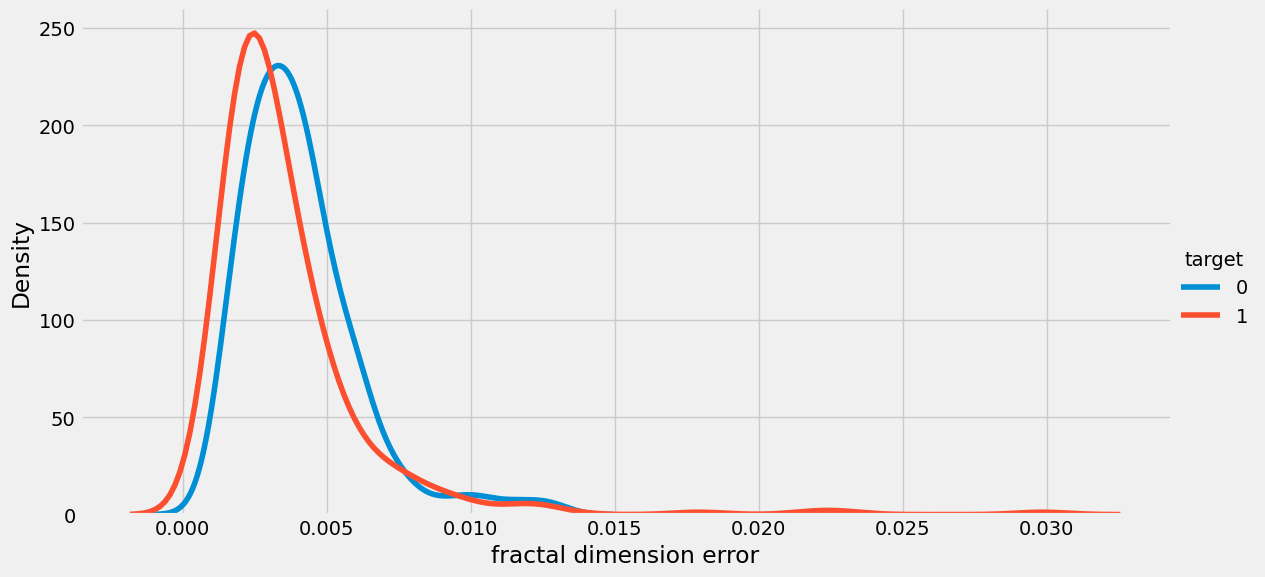

In [ ]:
def kde(col):
    grid = sns.FacetGrid(df, hue="target", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("fractal dimension error")

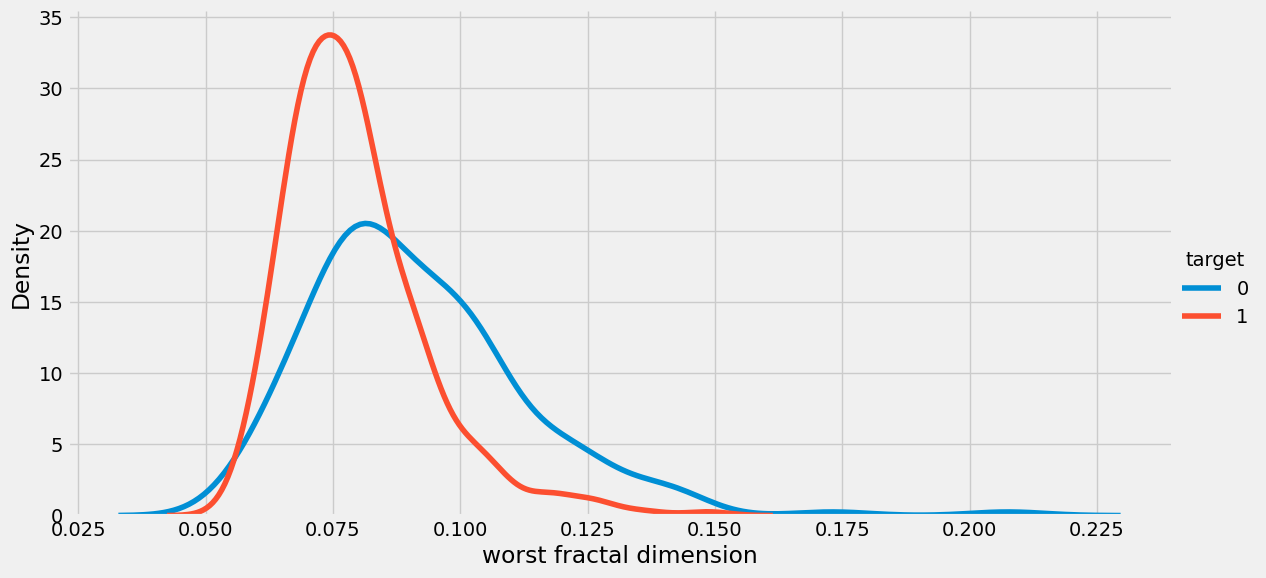

In [ ]:
kde("worst fractal dimension")

In [ ]:
def scatter(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color="class",template="ploty dark")
  return fig.show()

In [ ]:
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template="ploty_dark")
    fig.show()

In [ ]:

fig = go.Figure(data=[go.Scatter3d(
    x=df['mean radius'],
    y=df['mean perimeter'],
    z=df['mean area'],
    mode='markers',
    marker=dict(
        size=12,
        color=df['mean area'],
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='Mean Radius'),
        yaxis=dict(title='Mean Perimeter'),
        zaxis=dict(title='Mean Area')
    )
)

# Display the plot
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['mean area'],
    y=df['mean perimeter'],
    z=df['mean radius'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])
fig.update_layout(
    scene=dict(
        xaxis_title='Mean Area',
        yaxis_title='Mean Perimeter',
        zaxis_title='Mean Radius'
    ),
    title='3D Scatter Plot of Mean Area, Mean Perimeter, and Mean Radius'
)

# Show plot
fig.show()

In [ ]:
def iqr_outliers_detector(df):
    q1 = df.quantile(0.25, numeric_only=True)
    q3 = df.quantile(0.75, numeric_only=True)
    iqr = q3 - q1
    up_bnd = q3 + 1.5 * iqr
    lw_bnd = q1 - 1.5 * iqr

    outl_dict = {"Feature": [], "Total Outliers Count": [], "Outliers Rate": [], "Skewness": []}
    outl_index = list()

    for col in iqr.index:
        outl_df = df[(df[col] > up_bnd[col]) | (df[col] < lw_bnd[col])]
        outl_dict["Feature"].append(col)
        outl_dict["Total Outliers Count"].append(outl_df.shape[0])
        outl_dict["Outliers Rate"].append(round(100 * outl_df.shape[0] / df.shape[0], 1))
        outl_dict["Skewness"].append(round(df[col].skew(), 1))
        outl_index.extend(list(outl_df.index))

    outliers_df = pd.DataFrame(outl_dict).sort_values(by="Total Outliers Count")
    outliers_df_styled = outliers_df.style.format({"Total Outliers Count": "{:,}", "Outliers Rate": "{}%", "Skewness": "{:.1f}"})

    return outliers_df_styled, list(set(outl_index))## this is for multiple column


In [ ]:
def cap_outliers_ml(x):
  Q1=x.quantile(.25)
  Q3=x.quantile(.75)
  upper_fence=Q3+1.5*(Q3-Q1)
  lower_fence=(Q1-1.5*(Q3-Q1))
  x.clip(upper=upper_fence,inplace=True)
  x.clip(lower=lower_fence,inplace=True)
  return x ## capping the oulayers

In [100]:
X=df.drop(columns="target")
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [102]:
y=df[["target"]]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [105]:
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 1)
(426, 1)
(143, 1)


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc=StandardScaler()

In [108]:
sc.fit(X_train)

StandardScaler()

In [109]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [110]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,0.2070,1.2380,1.234,13.88,0.007595,0.015000,0.014120,0.008578,0.01792,0.001784,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,1.959,19.62,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,0.2580,1.1660,1.683,22.22,0.003741,0.005274,0.010650,0.005044,0.01344,0.001126,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.014460,0.014230,0.005297,0.01961,0.001700,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.026230,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.023480,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.000000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [111]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.159171,19.233005,92.143897,658.415023,0.096366,0.103670,0.088650,0.049144,0.180473,0.062617,0.404795,1.212227,2.840979,40.695674,0.006987,0.025078,0.031699,0.011702,0.020437,0.003713,16.316817,25.637981,107.459131,887.647887,0.132503,0.252836,0.269481,0.115279,0.289649,0.083540
std,3.552381,4.122619,24.437275,360.425054,0.013855,0.050683,0.078517,0.038819,0.027692,0.006852,0.287167,0.546234,2.061693,48.515510,0.002827,0.016972,0.031449,0.005913,0.008203,0.002630,4.894808,6.064671,33.965066,586.352988,0.022930,0.151899,0.198358,0.065619,0.063292,0.017795
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.362800,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.717500,16.170000,75.467500,421.100000,0.086635,0.066420,0.030090,0.020710,0.161500,0.057665,0.232675,0.831650,1.597000,17.852500,0.005213,0.013345,0.015543,0.007681,0.014982,0.002207,13.060000,21.342500,84.367500,516.825000,0.115825,0.148300,0.117125,0.065055,0.248050,0.071318
50%,13.375000,18.810000,86.290000,552.600000,0.095955,0.094035,0.061680,0.033770,0.178800,0.061635,0.317550,1.117500,2.224500,23.930000,0.006302,0.020435,0.025805,0.010800,0.018695,0.003093,14.965000,25.225000,97.585000,684.550000,0.132250,0.216000,0.230050,0.098855,0.281100,0.079930
75%,15.750000,21.590000,103.775000,771.775000,0.105400,0.129125,0.127075,0.075022,0.195300,0.065755,0.472250,1.470000,3.277750,44.867500,0.008161,0.031970,0.040020,0.014560,0.022927,0.004473,19.005000,29.410000,125.775000,1087.000000,0.145825,0.339700,0.379025,0.161375,0.318700,0.091640
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.023330,0.106400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


In [112]:
pd.DataFrame(X_train_sc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.650799,-0.430573,-0.680248,-0.626983,-0.913819,-0.933352,-0.787631,-0.679444,0.254041,-0.798772,-0.689589,0.047238,-0.780363,-0.553374,0.215464,-0.594503,-0.559643,-0.528893,-0.307186,-0.734142,-0.666144,0.018492,-0.681179,-0.631501,0.191962,-0.507751,-0.695929,-0.364339,0.323499,-0.757849
1,-0.828353,0.152265,-0.827738,-0.753094,0.652812,-0.708753,-1.066546,-1.071909,0.489037,-0.341454,-0.373723,1.381566,-0.428297,-0.434922,2.090910,-0.828105,-0.904196,-1.140327,2.684419,-0.666009,-0.887045,0.023445,-0.900486,-0.771001,0.432101,-1.029169,-1.292774,-1.450367,0.625631,-1.030714
2,1.682772,2.189772,1.600098,1.673839,0.103624,-0.005326,0.705766,1.257731,-0.190645,-1.064688,1.257556,2.292502,1.147018,1.204005,-0.431290,-0.050023,0.248337,0.859912,-0.177807,-0.462371,1.508098,2.082033,1.401345,1.439992,-0.694368,-0.399657,0.262556,0.725046,-0.513298,-0.966014
3,-0.160411,-0.338290,-0.241878,-0.239207,-1.220208,-1.247434,-0.875740,-0.948189,-0.837790,-1.083682,-0.511784,-0.084728,-0.562325,-0.381268,-1.149591,-1.168242,-0.670111,-1.127289,-0.854000,-0.984597,-0.167070,0.076272,-0.252000,-0.253640,-1.200842,-1.164088,-0.825141,-0.967772,-0.888195,-1.176430
4,0.713269,0.234834,0.612740,0.553289,-1.546108,-0.642973,-0.665094,-0.672481,0.149196,-1.368593,-0.549088,-1.180967,-0.517649,-0.366203,-1.529993,-0.626358,-0.556141,-1.084449,-0.100911,-0.766115,0.585631,0.152210,0.584842,0.335264,-1.379854,0.258130,-0.109936,-0.425826,2.816487,-0.411282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.310754,0.181407,1.178115,1.232174,-0.515658,-0.885548,-0.107748,0.239495,-0.920942,-1.849288,-0.266691,-0.704238,-0.232111,-0.081630,0.206964,-0.822206,-0.174117,0.495863,-0.138748,-0.775250,0.745170,-0.220878,0.634952,0.594798,-0.358173,-0.901896,-0.244699,0.215446,-0.521207,-1.472362
422,-0.478881,1.167376,-0.334878,-0.506984,1.606665,2.685120,1.767924,0.935857,0.814417,2.894839,-0.373723,0.708904,-0.389448,-0.345773,0.057495,2.777969,1.455849,0.443372,-0.310848,2.423574,-0.250931,2.483186,-0.289140,-0.300937,2.305182,5.306877,4.217126,1.613032,2.324533,6.974084
423,-1.331142,-0.221723,-1.324284,-1.055037,0.327635,-0.871325,-0.784826,-0.904859,-1.080017,1.018812,0.359463,0.063734,0.206879,-0.210813,-0.053367,-0.949507,-0.261664,-0.869745,-0.124102,-0.380536,-0.878864,-0.102018,-0.933499,-0.765025,0.034781,-0.975056,-0.782743,-0.988065,-0.699955,-0.122663
424,-1.251102,-0.246008,-1.287002,-1.028648,-1.941379,-1.584827,-1.130378,-1.267483,-0.548563,0.270739,-0.177440,6.731709,-0.296697,-0.392205,-1.867892,-1.081999,-1.009157,-1.981365,2.142488,-0.770683,-1.298576,-0.793717,-1.332613,-0.996898,-2.677913,-1.486588,-1.360156,-1.758873,-1.562061,-1.009897


In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model1=LogisticRegression()

In [115]:
model1.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_pred= model1.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [117]:
y_test

,target
512,0
457,1
439,1
298,1
37,1
...,...
236,0
113,1
527,1
76,1


In [118]:
from sklearn.metrics import accuracy_score

In [119]:
print(accuracy_score(y_test,y_pred))

0.958041958041958


In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [155]:
X_train.shape[1]

10

In [156]:
model=Sequential()
model.add(Dense(units=11, activation="linear", kernel_initializer="uniform", input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation="linear", kernel_initializer="uniform"))
model.add(Dense(units=4, activation="linear", kernel_initializer="uniform"))
model.add(Dense(units=1, activation="sigmoid", kernel_initializer="uniform"))

In [157]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258 (1.01 KB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [154]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_19" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 30)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30), dtype=float32)
  • training=False
  • mask=None

Epoch 1/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_19" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 30)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30), dtype=float32)
  • training=False
  • mask=None

In [158]:
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.rand(100, 1)
model=Sequential()
model.add(Dense(units=64, activation="linear", kernel_initializer="uniform", input_dim=X_train.shape[1]))
model.add(Dense(units=50, activation="linear", kernel_initializer="uniform"))
model.add(Dense(units=4, activation="linear", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [159]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,163 (16.26 KB)

 Trainable params: 4,163 (16.26 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [161]:
class LossLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}")

In [162]:
model.fit(X_train, y_train, epochs=10, callbacks=[LossLogger()])

Epoch 1/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 1:51 37s/step - accuracy: 0.0000e+00 - loss: 0.6931Epoch 1: Loss = 0.6924
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6927 
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.6930Epoch 2: Loss = 0.6907
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6917 
Epoch 3/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.6867Epoch 3: Loss = 0.6903
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6889 
Epoch 4/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.6908Epoch 4: Loss = 0.6893
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6894 
Epoch 5/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.6889Epoch 5: Loss = 0.6892
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6888 
Epoch 6/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0000e+00 -

In [163]:
predictions = model.predict(X_train)
print("Sample Predictions: ", predictions[:5])
print("Sample True Values: ", y_train[:5])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sample Predictions:  [[0.5188009 ]
 [0.5194861 ]
 [0.5240525 ]
 [0.52334005]
 [0.52359074]]
Sample True Values:  [[0.15074412]
 [0.92227671]
 [0.2658066 ]
 [0.15234944]
 [0.96361935]]


In [166]:
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels (0 or 1)

# Build the model
model = Sequential()

# First hidden layer
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Second hidden layer
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Third hidden layer
model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Fourth hidden layer
model.add(Dense(units=16, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Change the file path to end with .keras
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Fit the model with callbacks
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=10,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")



Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4119 - loss: 1.4909 - val_accuracy: 0.5000 - val_loss: 0.7486
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4433 - loss: 1.2861 - val_accuracy: 0.4500 - val_loss: 0.7390
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5663 - loss: 0.8900 - val_accuracy: 0.4500 - val_loss: 0.7283
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6209 - loss: 0.8081 - val_accuracy: 0.5000 - val_loss: 0.7216
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5063 - loss: 1.0013 - val_accuracy: 0.5500 - val_loss: 0.7214
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4248 - loss: 1.1760 - val_accuracy: 0.6000 - val_loss: 0.7118
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5455 - loss: 0.9165 - val_accuracy: 0.6000 - val_loss: 0.7026
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4787 - loss: 0.9937 - val_accuracy: 0.6000 - val_loss: 0.6978


In [167]:
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels (0 or 1)

# Build the model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Second hidden layer
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Third hidden layer
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Fit the model with callbacks
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=10,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")









Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.4660 - loss: 0.8936 - val_accuracy: 0.4500 - val_loss: 0.7828
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5569 - loss: 0.8967 - val_accuracy: 0.4500 - val_loss: 0.7675
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4530 - loss: 1.0998 - val_accuracy: 0.5000 - val_loss: 0.7486
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5073 - loss: 1.1024 - val_accuracy: 0.5000 - val_loss: 0.7283
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6378 - loss: 0.7860 - val_accuracy: 0.5000 - val_loss: 0.7035
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5429 - loss: 0.9052 - val_accuracy: 0.4500 - val_loss: 0.6813
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5375 - loss: 1.0610 - val_accuracy: 0.6000 - val_loss: 0.6665
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3851 - loss: 1.0185 - val_accuracy: 0.6000 - val_loss: 0.6556


In [168]:
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels (0 or 1)

# Build the model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Second hidden layer
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Third hidden layer
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout layer

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Fit the model with callbacks
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=10,  # Increased epochs
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")











Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5440 - loss: 0.9723 - val_accuracy: 0.3500 - val_loss: 0.9064
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5840 - loss: 1.0375 - val_accuracy: 0.3500 - val_loss: 0.8804
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5223 - loss: 1.1025 - val_accuracy: 0.3000 - val_loss: 0.8374
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5899 - loss: 1.0526 - val_accuracy: 0.4000 - val_loss: 0.7913
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4439 - loss: 1.1168 - val_accuracy: 0.4000 - val_loss: 0.7658
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3334 - loss: 1.3882 - val_accuracy: 0.4500 - val_loss: 0.7494
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4297 - loss: 1.3853 - val_accuracy: 0.5000 - val_loss: 0.7337
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5068 - loss: 1.1203 - val_accuracy: 0.5000 - val_loss:

In [172]:
# Sample Data
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels (0 or 1)

# Build the model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping, model checkpointing, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Fit the model with callbacks
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=10,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5772 - loss: 1.0142 - val_accuracy: 0.6500 - val_loss: 0.6543 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6460 - loss: 0.8325 - val_accuracy: 0.6000 - val_loss: 0.6572 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5581 - loss: 0.9312 - val_accuracy: 0.6500 - val_loss: 0.6565 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5653 - loss: 0.8377 - val_accuracy: 0.6500 - val_loss: 0.6640 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5054 - loss: 1.0401 - val_accuracy: 0.6000 - val_loss: 0.6753 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5572 - loss: 0.9489 - val_accuracy: 0.5000 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4457 - loss: 0.9815 - val_accuracy: 0.5000